# Wine Quality Prediction Project using Machine Learning with Python

#### By using machine learning for wine quality prediction enhances operational efficiency, provides objective information to consumers, and supports decision-making in the wine industry. In this project I am using the wine quality dataset available on Kaggle for free.

#### https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download&select=WineQT.csv


## Objective

#### Predict whether a wine is of good or bad quality based on factors such as chemical composition and other relevant attributes.

#### The main idea is initially perform an Exploratory Data Analysis for an understanding of the dataset. And finally analyze and predict wine quality by applying machine learning algorithms (classification models). Compare the evaluation metrics of some classification algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
# type of data present in each of the columns present in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB



#### Dataset consists of 1143 rows and 13 columns. Data type of almost variable are float

In [4]:
#descriptive statistical measures of the dataset.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Exploratory Data Analysis

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### It looks like there are no missing value. It means dataset can be processed.

In [6]:
# Let’s impute the missing values by means as the data present in the different columns are continuous values.


for col in df.columns:
  if df[col].isnull().sum() > 0:
      df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()



0

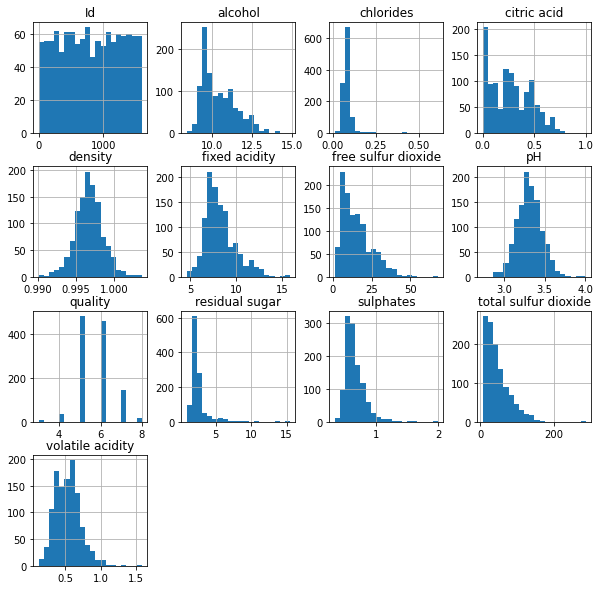

In [7]:
# Plotting histogram to visualise the distribution of the data

df.hist(bins=20, figsize=(10, 10))
plt.show()

In [8]:
df.nunique()  # There are a total of different features for each case

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

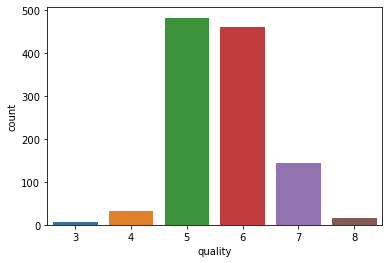

In [9]:
sb.countplot(df['quality'])

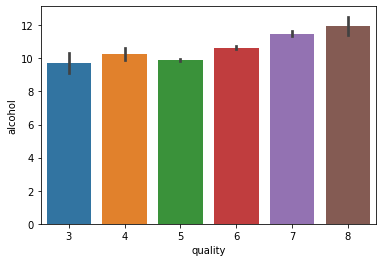

In [10]:
sb.barplot(x='quality', y='alcohol', data=df, edgecolor=None, linewidth=0)

# Analyzing the correlation between features

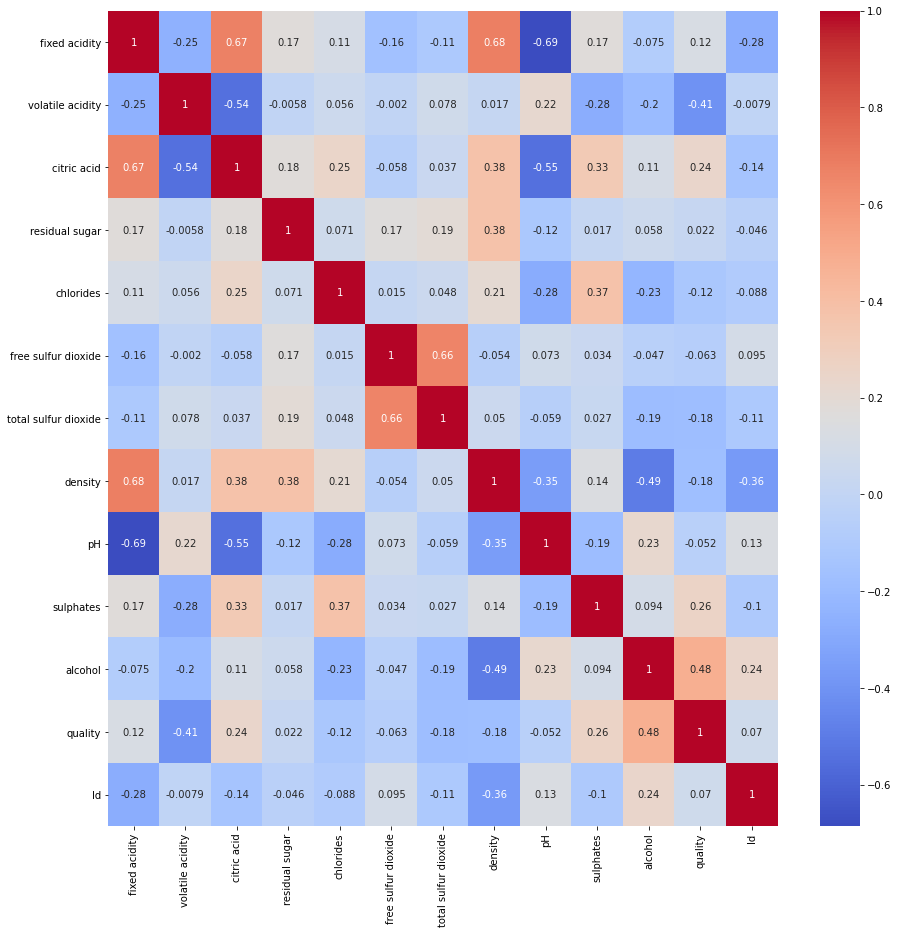

In [11]:
# Analyzing the correlation between features

plt.figure(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True, cmap = 'coolwarm',cbar=True)
plt.show()



In [12]:
df.corr()['quality'].sort_values(ascending=False)



quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

# Data Processing

In [13]:
# df['quality'] = df.quality.apply(lambda x:2 if x>6 else 0 if x<=5 else 1 )
df['quality'] = df.quality.apply(lambda x:1 if x>5 else 0 )


In [14]:
df['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

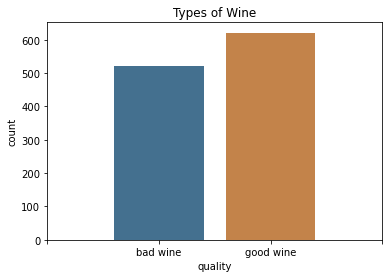

In [15]:
# Plot quality classification 
      
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.xticks([-1,0,1,2], ['','bad wine','good wine', ''])
plt.show()

# Machine Learning classification models

In [16]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

import joblib

In [17]:
X = df.drop(['quality','Id'], axis=1)
y = df['quality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (800, 11)
y_train (800,)
X_test (343, 11)
y_test (343,)


#### Normalizing data

In [20]:
# Normalizing data

norm = StandardScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)



#### Logistic regression

In [21]:
# Data processing and Model training for Logistic Regression
model_logreg = LogisticRegression(solver='lbfgs', multi_class = 'auto',class_weight='balanced')
model_logreg.fit(X_train, y_train)


# Perform cross-validation
cv_scores = cross_val_score(model_logreg, X_train, y_train, cv=5)

# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)

# Print cross-validation scores
print('Cross-Validation Scores:')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')
print(f'Mean CV Score: {cv_scores.mean():.4f}\n')

print('Logistic Regression:')
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds):.4f}')
print()

Cross-Validation Scores:
Fold 1: 0.7125
Fold 2: 0.7937
Fold 3: 0.7625
Fold 4: 0.7562
Fold 5: 0.7688
Mean CV Score: 0.7588

Logistic Regression:
Training Accuracy: 0.7762
Validation Accuracy: 0.7347



In [22]:
# Validation

y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 73.47%


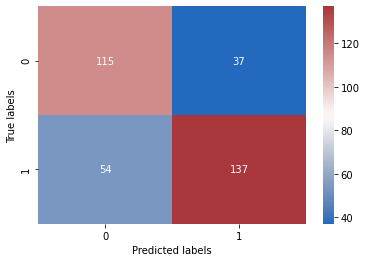

In [23]:
# Defining confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualizing confusion matrix

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Our model predicted ‘0’ correctly 115 times while predicting ‘0’ incorrectly 54 times
#### Also it predicted ‘1’ incorrectly 37 times while predicting ‘1’ correctly 137 times

In [24]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       152
           1       0.79      0.72      0.75       191

    accuracy                           0.73       343
   macro avg       0.73      0.74      0.73       343
weighted avg       0.74      0.73      0.74       343



#### Save the model

In [25]:
# Save the model
# Joblib

joblib.dump(model_logreg, 'LogReg_joblib.pkl')

['LogReg_joblib.pkl']

In [26]:
# Use the model
model_trained_joblib = joblib.load('LogReg_joblib.pkl')

In [27]:
new_data_joblib = pd.read_excel('new-data.xlsx')
new_data_joblib

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,76,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,98,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,92,15.0,54.0,997.0000,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,75,17.0,60.0,998.0000,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,76,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,75,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,69,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,65,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,73,9.0,18.0,0.9968,3.36,0.57,9.5


In [28]:
new_predictions_joblib = model_trained_joblib.predict(new_data_joblib)
new_predictions_joblib

/Users/adriandominguezcastro/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
new_data_joblib.insert(0, "Prediction", new_predictions_joblib, allow_duplicates= False)

In [30]:
new_data_joblib.sample(9)

,Prediction,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,0,7.8,0.88,0.00,2.6,98,25.0,67.0,0.9968,3.20,0.68,9.8
3,0,11.2,0.28,0.56,1.9,75,17.0,60.0,998.0000,3.16,0.58,9.8
8,0,7.8,0.58,0.02,2.0,73,9.0,18.0,0.9968,3.36,0.57,9.5
5,0,7.4,0.66,0.00,1.8,75,13.0,40.0,0.9978,3.51,0.56,9.4
6,0,7.9,0.60,0.06,1.6,69,15.0,59.0,0.9964,3.30,0.46,9.4
7,0,7.3,0.65,0.00,1.2,65,15.0,21.0,0.9946,3.39,0.47,10.0
2,0,7.8,0.76,0.04,2.3,92,15.0,54.0,997.0000,3.26,0.65,9.8
0,0,7.4,0.70,0.00,1.9,76,11.0,34.0,0.9978,3.51,0.56,9.4
4,0,7.4,0.70,0.00,1.9,76,11.0,34.0,0.9978,3.51,0.56,9.4


#### Random Forest

In [31]:
# Model training for Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_depth = 5, random_state=42, class_weight='balanced_subsample')
model_rf.fit(X_train, y_train)


# Perform cross-validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)

# Calculate predictions
train_preds = model_rf.predict(X_train)
val_preds = model_rf.predict(X_test)

# Print cross-validation scores
print('Cross-Validation Scores:')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')
print(f'Mean CV Score: {cv_scores.mean():.4f}\n')




print('Random Forest:')
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds):.4f}')
print()

Cross-Validation Scores:
Fold 1: 0.7125
Fold 2: 0.8000
Fold 3: 0.7937
Fold 4: 0.7562
Fold 5: 0.7438
Mean CV Score: 0.7613

Random Forest:
Training Accuracy: 0.8488
Validation Accuracy: 0.7726



In [32]:
# Validation

y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 77.26%


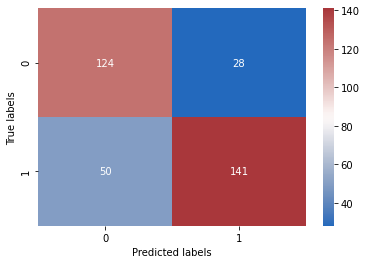

In [33]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [34]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       152
           1       0.83      0.74      0.78       191

    accuracy                           0.77       343
   macro avg       0.77      0.78      0.77       343
weighted avg       0.78      0.77      0.77       343



#### Save the model


In [35]:
# Save the model
# Joblib

joblib.dump(model_rf, 'RF_joblib.pkl')

['RF_joblib.pkl']

#### XGBoost

In [36]:
# Data processing and Model training for Random Forest

model_xgb = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
# Fit the model
model_xgb.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5)

# Calculate predictions
train_preds = model_xgb.predict(X_train)
val_preds = model_xgb.predict(X_test)

# Print cross-validation scores
print('Cross-Validation Scores:')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')
print(f'Mean CV Score: {cv_scores.mean():.4f}\n')

# Print training and validation accuracies
print('XGBoost:')
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds):.4f}')
print()

Cross-Validation Scores:
Fold 1: 0.7625
Fold 2: 0.7937
Fold 3: 0.7562
Fold 4: 0.7438
Fold 5: 0.7250
Mean CV Score: 0.7562

XGBoost:
Training Accuracy: 1.0000
Validation Accuracy: 0.7697



In [37]:
# Validation

y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 76.97%


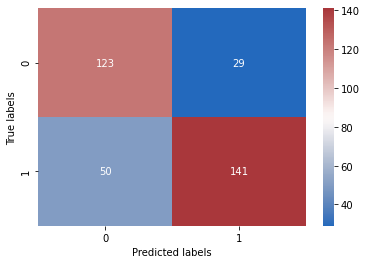

In [38]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [39]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,model_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       152
           1       0.83      0.74      0.78       191

    accuracy                           0.77       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.78      0.77      0.77       343



#### This suggests that the model has decent performance, but there might be some overfitting, as the training accuracy is higher than the validation accuracy.

#### Grid search

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Define a smaller parameter grid to search
param_grid = {
    'reg_alpha': [0, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    'learning_rate': [0.5, 0.2, 0.1, 0.05, 0.001, 0.0001],
    'max_depth': [None, 1, 3, 5, 7]
}

# Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_child_weight=1, random_state=42),
grid_search = GridSearchCV(estimator=XGBClassifier(n_estimators=100, min_child_weight=1, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Utilize the best parameters to train the model
best_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1,
                            reg_alpha=grid_search.best_params_['reg_alpha'], reg_lambda=grid_search.best_params_['reg_lambda'])

# Fit the best model
best_model.fit(X_train, y_train)

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Calculate predictions
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_test)

# Print cross-validation scores
print('Cross-Validation Scores:')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')
print(f'Mean CV Score: {cv_scores.mean():.4f}\n')

# Print training and validation accuracies
print('XGBoost:')
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds):.4f}')
print()

# Print the best model
#print("Best XGBoost model:")
#print(best_model)


Cross-Validation Scores:
Fold 1: 0.7438
Fold 2: 0.7937
Fold 3: 0.7688
Fold 4: 0.7562
Fold 5: 0.7438
Mean CV Score: 0.7613

XGBoost:
Training Accuracy: 0.8900
Validation Accuracy: 0.7638



#### Save the model

In [41]:
# Save the model
# Joblib

joblib.dump(best_model, 'XGBoost_joblib.pkl')

['XGBoost_joblib.pkl']

#### Deep Neural network

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers



# Crear el modelo secuencial
model = Sequential()

# Añadir capas densas
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))  # 1 nodo de salida para clasificación binaria


# Definir el learning rate
learning_rate = 0.01

# Compilar el modelo con el optimizador Adam y el learning rate especificado

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])



# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# Calculate predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias
train_preds_bin = (train_preds > 0.5).astype(int)
val_preds_bin = (val_preds > 0.5).astype(int)

# Calcular la precisión de entrenamiento y validación
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds_bin):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds_bin):.4f}')
print()




Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 1.3296 - accuracy: 0.6787 - val_loss: 0.7922 - val_accuracy: 0.6910
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.7500 - val_loss: 0.6482 - val_accuracy: 0.7551
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7513 - val_loss: 0.6327 - val_accuracy: 0.7405
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7700 - val_loss: 0.6333 - val_accuracy: 0.7201
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7738 - val_loss: 0.6246 - val_accuracy: 0.7230
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7475 - val_loss: 0.6315 - val_accuracy: 0.7580
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7538 - val_loss: 0.6363 - val_accuracy: 0.7201
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7800 - val_loss: 0.5921 - val_accuracy: 0.7347
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7650 - val_loss: 0.5874 - val_accuracy: 0.7405
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7688 - val_loss: 0.5858 - val_accuracy: 0.7434
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7688 - val_loss: 0.5848 - val_accuracy: 0.7522
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7775 - val_loss: 0.5907 - val_accuracy: 0.7493
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7750 - val_loss: 0.5908 - val_accuracy: 0.7580
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7800 - val_loss: 0.6096 - val_accuracy: 0.7755
Epoch 

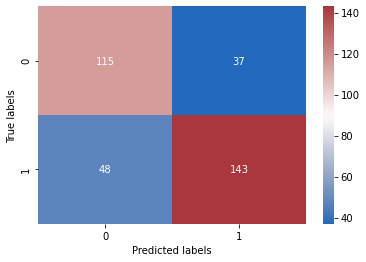

In [43]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, val_preds_bin)

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [44]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,val_preds_bin))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       152
           1       0.79      0.75      0.77       191

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.76      0.75      0.75       343



In [45]:
# Save the model
model.save('dnn_model.h5')

# Load the model
#loaded_model = tf.keras.models.load_model('my_model.h5')


# Conclusions

#### The most relevant results obtained for the Machine Learning algorithms explored are ( order based on the Validation Accuracy):
#### * Random Forest            ( 77.26%)
#### * XGBoost                       ( 76.38%)
#### * Deep Neural Network  (75.22%)
#### * Logistic Regression     (73.4%)
#### The accuracy of the wine quality prediction results can be improved by increasing the amount of data obtaining a superior balance between the different class of wine quality studied here.
#### In addition, a search of hyperparameters, the use of regularization, and a simplification of the model are alternatives to consider to avoid potential overfitting and a overall model performance.